In [62]:
import pandas as pd
from numpy import mean
from numpy import std
from matplotlib import pyplot
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [63]:
dataset = pd.read_csv('Hasil Tes SBK LPDP Gelombang I - 2021 (Responses) - Form Responses 1.csv')
dataset

,Timestamp,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,6/24/2021 15:54:15,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6,Universitas Indonesia
1,6/24/2021 15:54:22,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8,UCL
2,6/24/2021 15:54:54,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7,KTH Sweden
3,6/24/2021 15:56:06,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4,UGM
4,6/24/2021 15:56:28,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7,University of Birmingham
...,...,...,...,...,...,...,...,...,...,...,...
426,10/13/2021 20:21:59,Reguler,S2,Dalam negeri,718,Tidak,Tidak,23,25,12,UGM
427,10/16/2021 8:54:13,Reguler,S2,Dalam negeri,TRP,Tidak,Tidak,14,14,6,UI
428,10/18/2021 14:20:18,Targeted,S2,Luar Negeri,ENT,Tidak,Tidak,15,7,9,Imperial College London
429,10/19/2021 21:23:43,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,17,11,6,NaN


In [64]:
new_dataset = dataset.drop(['Timestamp', '[optional] Kampus/universitas tujuan saat ini (pilihan 1)'], axis = 1)
new_dataset

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah
0,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6
1,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8
2,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7
3,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4
4,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7
...,...,...,...,...,...,...,...,...,...
426,Reguler,S2,Dalam negeri,718,Tidak,Tidak,23,25,12
427,Reguler,S2,Dalam negeri,TRP,Tidak,Tidak,14,14,6
428,Targeted,S2,Luar Negeri,ENT,Tidak,Tidak,15,7,9
429,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,17,11,6


(431, 9)
       Jumlah Jawaban Benar pada Tes Penalaran Verbal  \
count                                      431.000000   
mean                                        14.883991   
std                                          2.645839   
min                                          0.000000   
25%                                         13.000000   
50%                                         15.000000   
75%                                         17.000000   
max                                         23.000000   

       Jumlah Jawaban Benar pada Tes Kuantitatif  \
count                                 431.000000   
mean                                   14.626450   
std                                     4.394198   
min                                     0.000000   
25%                                    12.000000   
50%                                    15.000000   
75%                                    18.000000   
max                                    25.000000   

       J

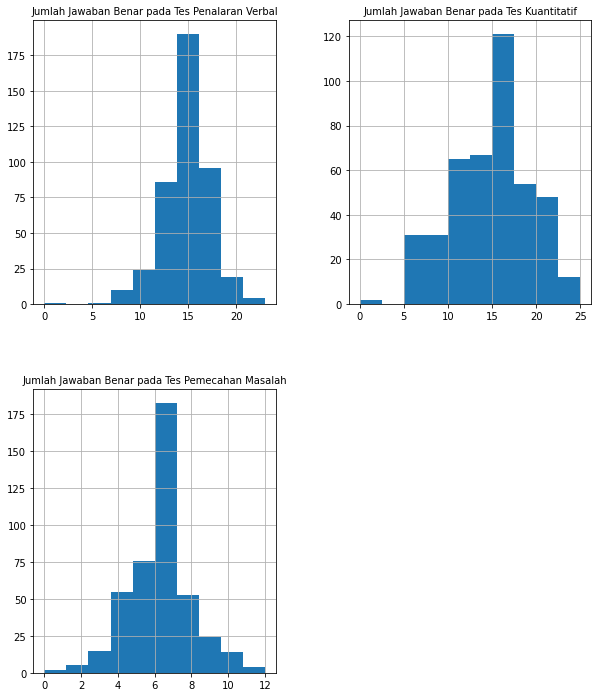

In [65]:
# 10.1 Sebelum melakukan transformasi
print(new_dataset.shape)
print(new_dataset.describe())

# histogram
fig = new_dataset.hist(xlabelsize=10, ylabelsize=10, figsize=(10,12))
[x.title.set_size(10) for x in fig.ravel()]
# menampilkan plot
pyplot.show()

In [66]:
X = new_dataset.values[:, [0,1,2,3,4,6,7,8]]
y = new_dataset.values[:, [5]]

In [67]:
X

array([['Targeted', 'S2', 'Dalam negeri', ..., 10, 12, 6],
       ['Reguler', 'S2', 'Luar Negeri', ..., 17, 22, 8],
       ['Targeted', 'S2', 'Luar Negeri', ..., 16, 18, 7],
       ...,
       ['Targeted', 'S2', 'Luar Negeri', ..., 15, 7, 9],
       ['Targeted', 'S2', 'Dalam negeri', ..., 17, 11, 6],
       ['Reguler', 'S2', 'Luar Negeri', ..., 18, 12, 7]], dtype=object)

In [68]:
y

array([['Ya'],
       ['Ya'],
       ['Ya'],
       ['Tidak'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Tidak'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Tidak'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Tidak'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Tidak'],
       ['Tidak'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Tidak'],
       ['Tidak'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
       ['Ya'],
 

In [69]:
oe = OrdinalEncoder()
X_oe = oe.fit_transform(X)

le = LabelEncoder()
y_le = le.fit_transform(y)

c:\users\moody asyer\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [70]:
X_oe

array([[ 2.,  0.,  0., ...,  5.,  9.,  6.],
       [ 1.,  0.,  1., ..., 12., 19.,  8.],
       [ 2.,  0.,  1., ..., 11., 15.,  7.],
       ...,
       [ 2.,  0.,  1., ..., 10.,  4.,  9.],
       [ 2.,  0.,  0., ..., 12.,  8.,  6.],
       [ 1.,  0.,  1., ..., 13.,  9.,  7.]])

In [71]:
y_le

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [72]:
model = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_oe, y_le, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.803 (0.051)


In [73]:
# 10.1 Setelah melakukan transformasi

# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_oe, y_le, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.791 (0.048)
